In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymysql
import getpass

%matplotlib inline

# Introduction to Matplotlib

## 1. Plot monhtly revenue (olist)

In [2]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=getpass.getpass(),
                       db="olist")

········


In [3]:
order_items = pd.read_sql("SELECT * FROM order_items", conn)
orders = pd.read_sql("SELECT * FROM orders", conn)

In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**1. Join the two tables**

In [6]:
price_ts = order_items.merge(orders, on="order_id")[["price", "order_purchase_timestamp"]]

In [7]:
price_ts.head()

,price,order_purchase_timestamp
0,58.90,2017-09-13 08:59:02
1,239.90,2017-04-26 10:53:06
2,199.00,2018-01-14 14:33:31
3,12.99,2018-08-08 10:00:35
4,199.90,2017-02-04 13:57:51


| month_id | SUM(price) |
|----------|---------|
| 2017-01  | 9358195 |
| 2017-02  | 3150902 |
| ...      | ...     |

In [8]:
price_ts = price_ts.assign(month_id='YYYY-MM')

In [9]:
price_ts.dtypes

price                              float64
order_purchase_timestamp    datetime64[ns]
month_id                            object
dtype: object

In [10]:
price_ts["order_purchase_timestamp"].dt.year

0         2017
1         2017
2         2018
3         2018
4         2017
          ... 
112641    2018
112642    2018
112643    2017
112644    2017
112645    2018
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [11]:
price_ts["order_purchase_timestamp"].dt.month

0          9
1          4
2          1
3          8
4          2
          ..
112641     4
112642     7
112643    10
112644     8
112645     6
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [12]:
price_ts["order_purchase_timestamp"].dt.year + price_ts["order_purchase_timestamp"].dt.month

0         2026
1         2021
2         2019
3         2026
4         2019
          ... 
112641    2022
112642    2025
112643    2027
112644    2025
112645    2024
Name: order_purchase_timestamp, Length: 112646, dtype: int64

In [13]:
price_ts["order_purchase_timestamp"].dt.year.astype(str) + "-" + price_ts["order_purchase_timestamp"].dt.month.astype(str)

0          2017-9
1          2017-4
2          2018-1
3          2018-8
4          2017-2
           ...   
112641     2018-4
112642     2018-7
112643    2017-10
112644     2017-8
112645     2018-6
Name: order_purchase_timestamp, Length: 112646, dtype: object

In [14]:
price_ts["month_id"] = pd.to_datetime(price_ts["order_purchase_timestamp"].dt.strftime("%Y-%m-01"))

In [15]:
price_ts.head()

,price,order_purchase_timestamp,month_id
0,58.90,2017-09-13 08:59:02,2017-09-01
1,239.90,2017-04-26 10:53:06,2017-04-01
2,199.00,2018-01-14 14:33:31,2018-01-01
3,12.99,2018-08-08 10:00:35,2018-08-01
4,199.90,2017-02-04 13:57:51,2017-02-01


In [16]:
price_ts.dtypes

price                              float64
order_purchase_timestamp    datetime64[ns]
month_id                    datetime64[ns]
dtype: object

In [17]:
(price_ts
 .groupby("month_id")
 .agg({"price": np.sum})
 .rename(columns={"price": "revenue"}))

,revenue
month_id,
2016-09-01,267.36
2016-10-01,49507.66
2016-12-01,10.90
2017-01-01,120312.87
2017-02-01,247303.02
2017-03-01,374198.32
2017-04-01,359927.23
2017-05-01,505871.16
2017-06-01,433038.60


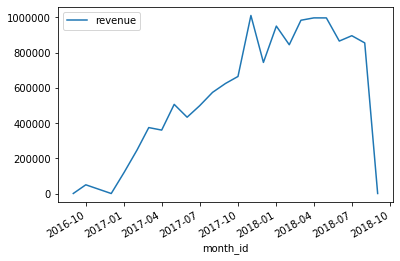

In [18]:
(price_ts
 .groupby("month_id")
 .agg({"price": np.sum})
 .rename(columns={"price": "revenue"})).plot();

In [19]:
monthly_rev = (price_ts
               .groupby("month_id", as_index=False)
               .agg({"price": np.sum})
               .rename(columns={"price": "revenue"}))

In [20]:
monthly_rev.dtypes

month_id    datetime64[ns]
revenue            float64
dtype: object

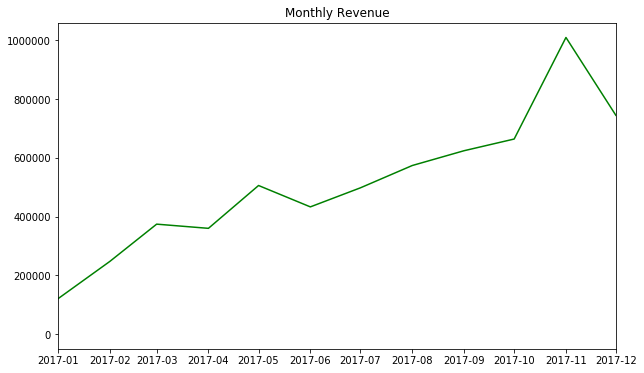

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

# draw the graph
ax.plot(monthly_rev["month_id"],
        monthly_rev["revenue"],
        color="green");

ax.set_title("Monthly Revenue");
ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

# 2. Items sold for each product category

In [22]:
products = pd.read_sql("SELECT * FROM products", conn)

In [24]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


| product_category | items_sold |
|------------------|------------|
| artes | 12353 |
| esporte_lazer | 12353 |
| ... | ... |

In [30]:
items_sold_per_cat = (order_items
                      .merge(products, on="product_id")
                      .groupby("product_category_name", as_index=False)
                      .agg({"order_id": "count"})
                      .rename(columns={"order_id": "items_sold"}))

items_sold_per_cat.head()

,product_category_name,items_sold
0,agro_industria_e_comercio,212
1,alimentos,510
2,alimentos_bebidas,278
3,artes,209
4,artes_e_artesanato,24


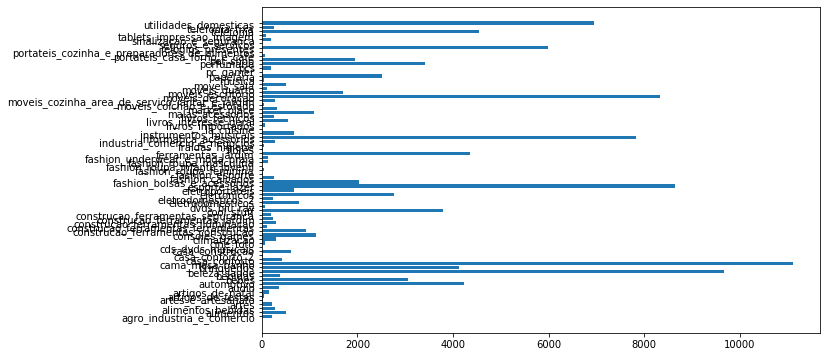

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(items_sold_per_cat["product_category_name"],
        items_sold_per_cat["items_sold"],);

### How do our top categories compare?

In [42]:
top_cats = (items_sold_per_cat
            .sort_values("items_sold", ascending=False)
            .head(10)
            .reset_index(drop=True))

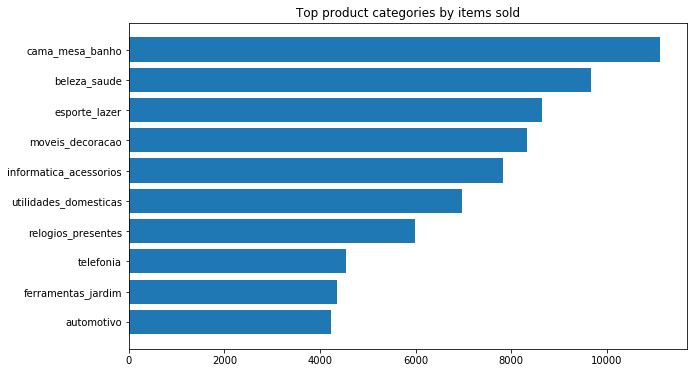

In [47]:
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(top_cats["product_category_name"],
        top_cats["items_sold"]);
ax.invert_yaxis();
ax.set_title("Top product categories by items sold");

In [52]:
top_cats["product_category_name"]

0           cama_mesa_banho
1              beleza_saude
2             esporte_lazer
3          moveis_decoracao
4    informatica_acessorios
5     utilidades_domesticas
6        relogios_presentes
7                 telefonia
8        ferramentas_jardim
9                automotivo
Name: product_category_name, dtype: object

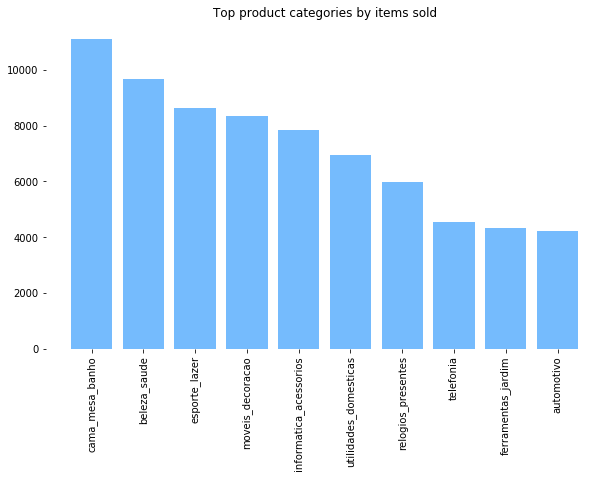

In [68]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_cats["product_category_name"],
       top_cats["items_sold"],
       color="xkcd:sky blue");

ax.set_title("Top product categories by items sold");
ax.set_xticklabels(top_cats["product_category_name"], rotation=90);
# ax.tick_params(labelrotation=45);

ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.spines["left"].set_visible(False);
ax.spines["bottom"].set_visible(False);

# 3. Two graphs in one

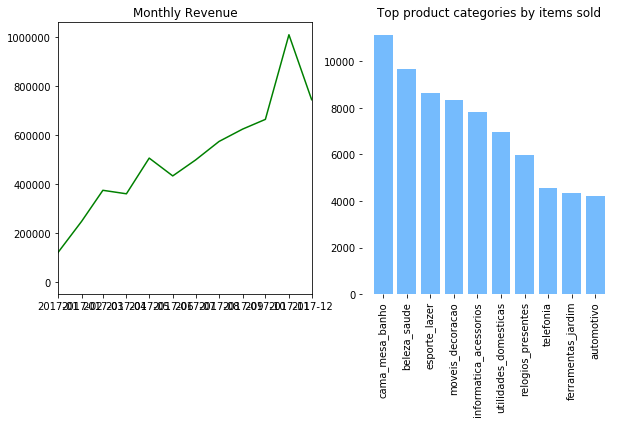

In [85]:
fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(10,5))

# draw monhtly revenue
axes[0].plot(monthly_rev["month_id"],
             monthly_rev["revenue"],
             color="green");

axes[0].set_title("Monthly Revenue");
axes[0].set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

# draw top categories
axes[1].bar(top_cats["product_category_name"],
       top_cats["items_sold"],
       color="xkcd:sky blue");

axes[1].set_title("Top product categories by items sold");
axes[1].set_xticklabels(top_cats["product_category_name"], rotation=90);
# ax.tick_params(labelrotation=45);

axes[1].spines["top"].set_visible(False);
axes[1].spines["right"].set_visible(False);
axes[1].spines["left"].set_visible(False);
axes[1].spines["bottom"].set_visible(False);

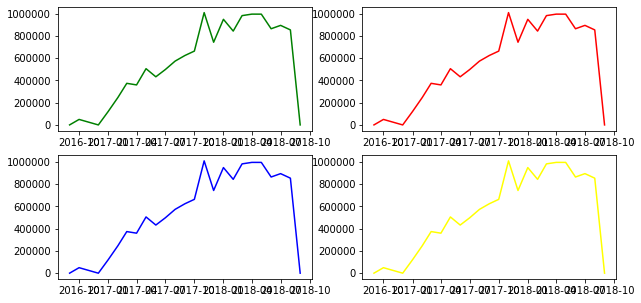

In [92]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10,5))

axes[0,0].plot(monthly_rev["month_id"],
               monthly_rev["revenue"],
               color="green");

axes[0,1].plot(monthly_rev["month_id"],
               monthly_rev["revenue"],
               color="red");

axes[1,0].plot(monthly_rev["month_id"],
               monthly_rev["revenue"],
               color="blue");

axes[1,1].plot(monthly_rev["month_id"],
               monthly_rev["revenue"],
               color="yellow");

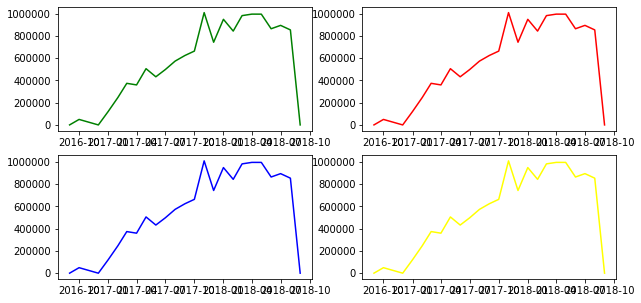

In [93]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(10,5))
colors = ["green", "red", "blue", "yellow"]

i = 0
for ax in axes.flat:
    ax.plot(monthly_rev["month_id"],
            monthly_rev["revenue"],
            color=colors[i])
    i+=1

# Monthly Revenue of Top 3 Categories (of all time)

| month_id | product_category | revenue |
|----------|------------------|---------|
| 2017-01  | banho | 31263 |
| 2017-01  | mesa | 12501 |
| 2017-01  | esporte | 190501 |
| 2017-02  | banho | 160902 |
| 2017-02  | mesa | 12360 |
| ... | ... | ... |

In [101]:
monthly_rev_cat = (order_items
                   .merge(orders, on="order_id")
                   .merge(products, on="product_id")
                   [["order_purchase_timestamp", "product_category_name", "price"]])
monthly_rev_cat.head()

,order_purchase_timestamp,product_category_name,price
0,2017-09-13 08:59:02,cool_stuff,58.9
1,2017-06-28 11:52:20,cool_stuff,55.9
2,2018-05-18 10:25:53,cool_stuff,64.9
3,2017-08-01 18:38:42,cool_stuff,58.9
4,2017-08-10 21:48:40,cool_stuff,58.9


In [110]:
monthly_rev_cat = (monthly_rev_cat
                   .assign(month_id=pd.to_datetime(monthly_rev_cat["order_purchase_timestamp"].dt.strftime("%Y-%m-01")))
                   .drop(columns=["order_purchase_timestamp"])
                   .groupby(["month_id", "product_category_name"], as_index=False)
                   .agg({"price": "sum"})
                   .rename(columns={"price": "revenue"}))

In [115]:
# find top 3 categories
top_3_cats = list(top_cats.head(3)["product_category_name"])

In [125]:
# filter monthly_rev_cat for only those categories that are in top_3_cats
monthly_rev_cat = (monthly_rev_cat
                   [monthly_rev_cat["product_category_name"].isin(top_3_cats)]
                   .sort_values(["month_id", "product_category_name"])
                   .reset_index(drop=True))

In [132]:
monthly_rev_cat

,month_id,product_category_name,revenue
0,2016-09-01,beleza_saude,134.97
1,2016-10-01,beleza_saude,4552.51
2,2016-10-01,cama_mesa_banho,478.99
3,2016-10-01,esporte_lazer,3333.64
4,2017-01-01,beleza_saude,12561.32
...,...,...,...
59,2018-07-01,cama_mesa_banho,55082.82
60,2018-07-01,esporte_lazer,55292.68
61,2018-08-01,beleza_saude,120803.94
62,2018-08-01,cama_mesa_banho,61035.88


In [129]:
top_3_cats

['cama_mesa_banho', 'beleza_saude', 'esporte_lazer']

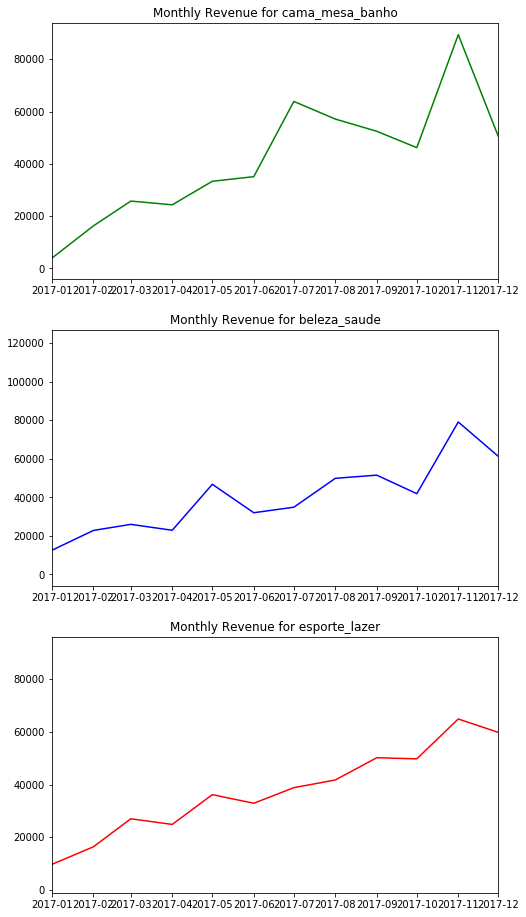

In [135]:
fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(8,16))


axes[0].plot(monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "cama_mesa_banho", "month_id"],
             monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "cama_mesa_banho", "revenue"],
             color="green");

axes[0].set_title("Monthly Revenue for cama_mesa_banho");
axes[0].set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

axes[1].plot(monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "beleza_saude", "month_id"],
             monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "beleza_saude", "revenue"],
             color="blue");

axes[1].set_title("Monthly Revenue for beleza_saude");
axes[1].set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

axes[2].plot(monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "esporte_lazer", "month_id"],
             monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == "esporte_lazer", "revenue"],
             color="red");

axes[2].set_title("Monthly Revenue for esporte_lazer");
axes[2].set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

In [136]:
top_3_cats

['cama_mesa_banho', 'beleza_saude', 'esporte_lazer']

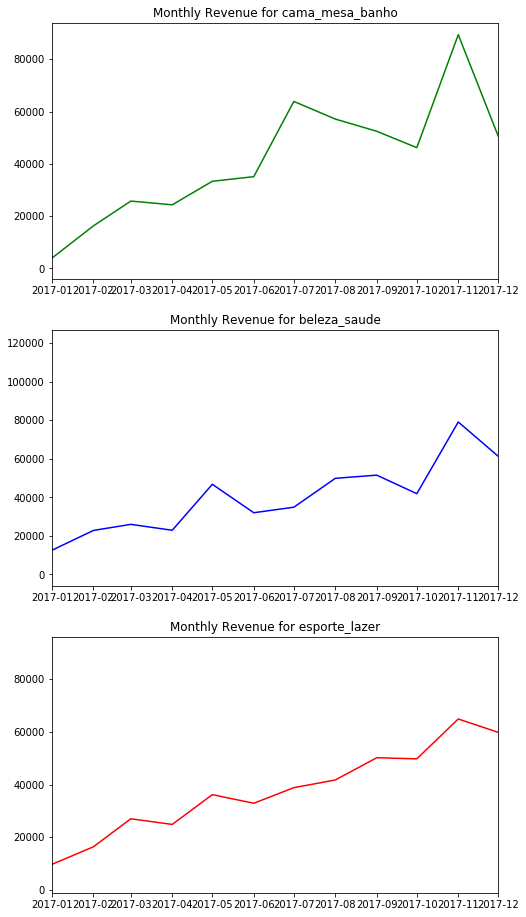

In [143]:
fig, axes = plt.subplots(nrows=3,
                         ncols=1,
                         figsize=(8,16))

c = ["green", "blue", "red"]

for ax, cat, color in zip(axes, top_3_cats, c):
    ax.plot(monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == cat, "month_id"],
                 monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == cat, "revenue"],
                 color=color);

    ax.set_title(f"Monthly Revenue for {cat}");
    ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

In [141]:
a = [1,2,3]
b = ["a", "b", "c"]
c = [10,20,30]

list(zip(a,b,c))

for i, j, k in zip(a,b,c):
    print(i)
    print(j)
    print(k)

1
a
10
2
b
20
3
c
30


In [146]:
list(enumerate(a))

[(0, 1), (1, 2), (2, 3)]

---

Put them all in one graph

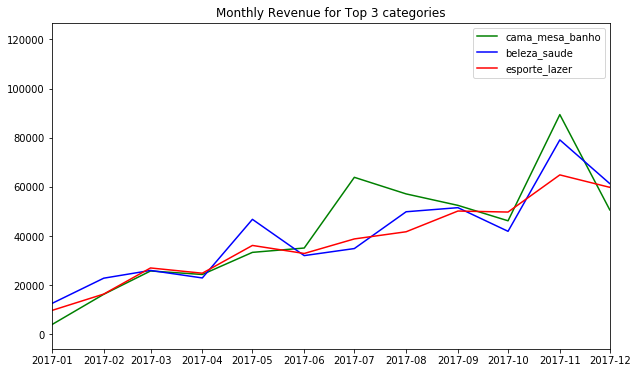

In [155]:
fig, ax = plt.subplots(figsize=(10,6))

for cat, color in zip(top_3_cats, c):
    ax.plot(monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == cat, "month_id"],
            monthly_rev_cat.loc[monthly_rev_cat["product_category_name"] == cat, "revenue"],
            color=color,
            label=cat);

    ax.set_xlim((pd.to_datetime("2017-01-01"), pd.to_datetime("2017-12-01")));

ax.set_title("Monthly Revenue for Top 3 categories");
ax.legend();

In [156]:
import seaborn as sns

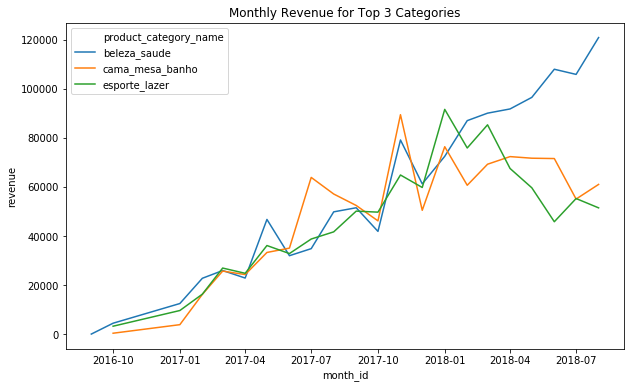

In [162]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=monthly_rev_cat,
             x="month_id",
             y="revenue",
             hue="product_category_name");

ax.set_title("Monthly Revenue for Top 3 Categories");

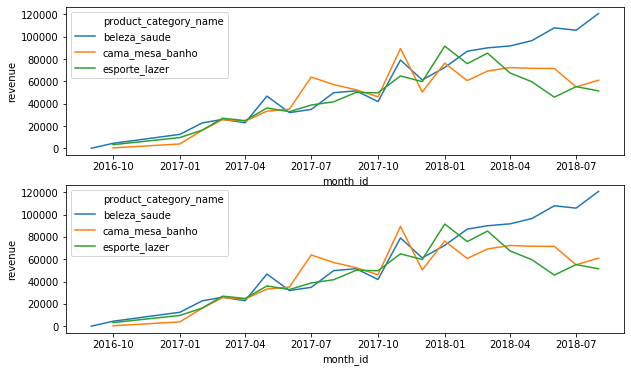

In [160]:
fig, ax = plt.subplots(nrows=2,
                       ncols=1,
                       figsize=(10,6))

sns.lineplot(data=monthly_rev_cat,
             x="month_id",
             y="revenue",
             hue="product_category_name",
             ax=ax[0]);

sns.lineplot(data=monthly_rev_cat,
             x="month_id",
             y="revenue",
             hue="product_category_name",
             ax=ax[1]);